In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV

In [3]:
df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
datasets = [df, test_df]
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [6]:
test_df.count()

PassengerId    418
Pclass         418
Name           418
Sex            418
Age            332
SibSp          418
Parch          418
Ticket         418
Fare           417
Cabin           91
Embarked       418
dtype: int64

In [7]:
people_quantity = df.PassengerId.nunique()
people_quantity

891

In [8]:
for dataset in datasets:
    dataset.drop(['Cabin', 'Name', 'Ticket'], axis=1, inplace=True)
    dataset.loc[(dataset.Sex=='male') & (dataset.Age.isna()), 'Age'] = dataset[dataset.Sex=='male'].Age.dropna().median()
    dataset.loc[(dataset.Sex=='female') & (dataset.Age.isna()), 'Age'] = dataset[dataset.Sex=='female'].Age.dropna().median()
    dataset.loc[dataset.Fare.isna(), 'Fare'] = dataset.Fare.dropna().mean()
    dataset.loc[(dataset.Embarked.isna()), 'Embarked'] = dataset.Embarked.dropna().value_counts().index[0]

Text(0.5, 1.0, 'Survivevrs count')

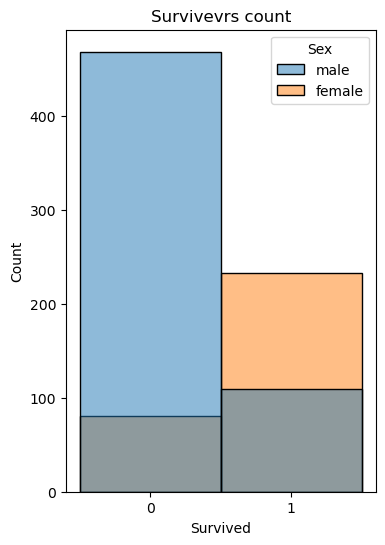

In [9]:
fig_surv = plt.figure(figsize=(4, 6))
sns.histplot(df, x=df['Survived'].apply(str), hue='Sex', binwidth=0.1)
plt.title('Survivevrs count')

In [10]:
quantity_male = df[df['Sex']=='male'].Sex.count()
quantity_female = df[df['Sex']=='female'].Sex.count()
quantity_male_percent = round(quantity_male / people_quantity, 2)
quantity_female_percent = round(quantity_female / people_quantity, 2)
quantity_male_survived = round(df[(df['Sex']=='male') & (df['Survived']==1)].Sex.count(), 2)
quantity_female_survived = round(df[(df['Sex']=='female') & (df['Survived']==1)].Sex.count(), 2)
quantity_male_survived_percent = round(quantity_male_survived / quantity_male, 2)
quantity_female_survived_percent = round(quantity_female_survived / quantity_female, 2)

data = {'Quantity': [quantity_male, quantity_female],
        'Quantity, %': [quantity_male_percent, quantity_female_percent],
        'Survived': [quantity_male_survived, quantity_female_survived],
        'Survived, %': [quantity_male_survived_percent, quantity_female_survived_percent]}
gender_surv = pd.DataFrame.from_dict(data, orient='index',
                                     columns=['Male', 'Female'])
gender_surv

,Male,Female
Quantity,577.00,314.00
"Quantity, %",0.65,0.35
Survived,109.00,233.00
"Survived, %",0.19,0.74


(0.0, 175.0)

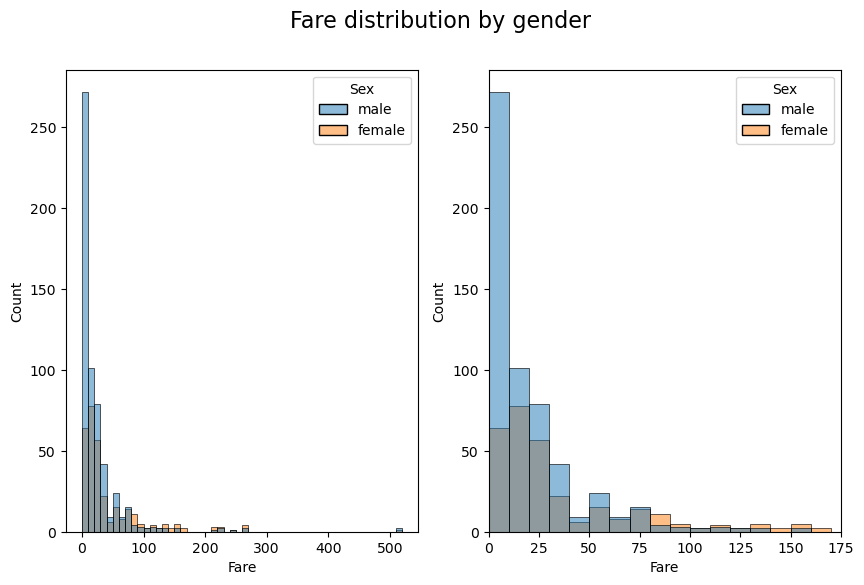

In [11]:
gender_fare_distr, axes = plt.subplots(1,2, figsize=(10, 6))
sns.histplot(df, x='Fare', hue='Sex', binwidth=10, ax=axes[0])
sns.histplot(df, x='Fare', hue='Sex', binwidth=10, ax=axes[1])
gender_fare_distr.suptitle('Fare distribution by gender', fontsize=16)
axes[1].set_xlim(0, 175)

((500.0, 540.0), (0.0, 10.0))

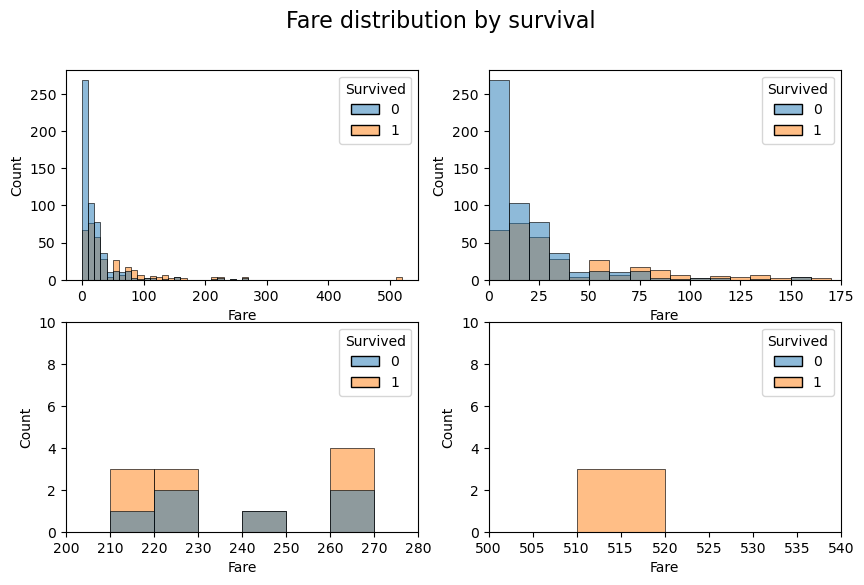

In [12]:
surv_fare_distr, axes = plt.subplots(2,2, figsize=(10, 6))
surv_fare_distr.suptitle('Fare distribution by survival', fontsize=16)
sns.histplot(df, x='Fare', hue='Survived', binwidth=10, ax=axes[0, 0])
sns.histplot(df, x='Fare', hue='Survived', binwidth=10, ax=axes[0, 1])
sns.histplot(df, x='Fare', hue='Survived', binwidth=10, ax=axes[1, 0])
sns.histplot(df, x='Fare', hue='Survived', binwidth=10, ax=axes[1, 1])
axes[0, 1].set_xlim(0, 175)
axes[1, 0].set_xlim(200, 280), axes[1, 0].set_ylim(0, 10)
axes[1, 1].set_xlim(500, 540), axes[1, 1].set_ylim(0, 10)
#as we can see fare correlates with survival rate
#now let's consider to divide it into several groups

Text(0.5, 1.0, 'Fare-Age Distribution')

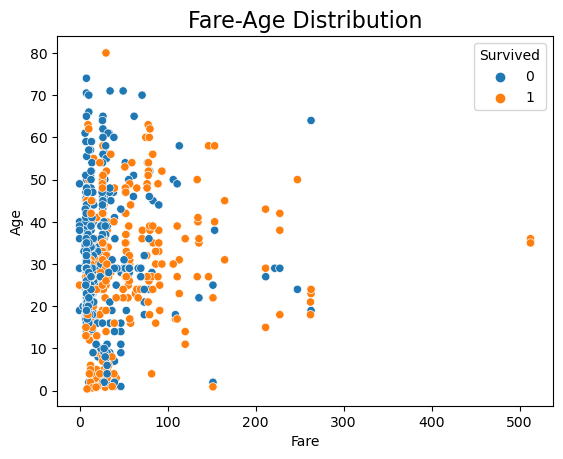

In [13]:
sns.scatterplot(df, x='Fare', y='Age', hue='Survived')
plt.title('Fare-Age Distribution', fontsize=16)

In [14]:
#calculating length for partial intervals
def interval(df_col):
    return int((df_col.max() - df_col.min()) / (1 + 3.22*np.log10(df_col.count())))

In [15]:
df['Fare_Cut'] = pd.cut(df.Fare, interval(df.Fare))
df[['Fare_Cut', 'Survived', 'Sex']].groupby(['Fare_Cut'], as_index=False)\
                                  .agg({'Survived': 'mean', 'Sex':'count'})\
                                  .rename({'Sex': 'count'}, axis=1).head(20)

,Fare_Cut,Survived,count
0,"(-0.512, 10.674]",0.208791,364
1,"(10.674, 21.347]",0.429412,170
2,"(21.347, 32.021]",0.458904,146
3,"(32.021, 42.694]",0.375000,40
4,"(42.694, 53.368]",0.433333,30
5,"(53.368, 64.041]",0.739130,23
6,"(64.041, 74.715]",0.333333,21
7,"(74.715, 85.388]",0.741935,31
8,"(85.388, 96.062]",0.923077,13
9,"(96.062, 106.735]",0.500000,2


In [16]:
df['Age_Cut'] = pd.cut(df.Age, interval(df.Age))
df[['Age_Cut', 'Survived', 'Sex']].groupby(['Age_Cut'], as_index=False)\
                                  .agg({'Survived': 'mean', 'Sex':'count'})\
                                  .rename({'Sex': 'count'}, axis=1)

,Age_Cut,Survived,count
0,"(0.34, 11.789]",0.573529,68
1,"(11.789, 23.157]",0.359551,178
2,"(23.157, 34.526]",0.353659,410
3,"(34.526, 45.894]",0.417910,134
4,"(45.894, 57.263]",0.411765,68
5,"(57.263, 68.631]",0.346154,26
6,"(68.631, 80.0]",0.142857,7


In [17]:
df.drop(['Age_Cut', 'Fare_Cut'], axis=1, inplace=True)

In [18]:
#now let's group our data and encode it: 
for dataset in datasets: 
    dataset.loc[dataset['Fare'] < 11, 'Fare'] = 0
    dataset.loc[((dataset['Fare'] >= 11) & (dataset['Fare'] < 32)), 'Fare'] = 1
    dataset.loc[((dataset['Fare'] >= 32) & (dataset['Fare'] < 54)), 'Fare'] = 2
    dataset.loc[dataset['Fare'] >= 54, 'Fare'] = 3
    
    dataset.loc[dataset['Age'] < 12, 'Age'] = 0
    dataset.loc[(dataset['Age'] >= 12) & (dataset['Age'] < 35), 'Age'] = 1
    dataset.loc[(dataset['Age'] >= 35) & (dataset['Age'] < 57), 'Age'] = 2
    dataset.loc[(dataset['Age'] >= 57), 'Age'] = 3

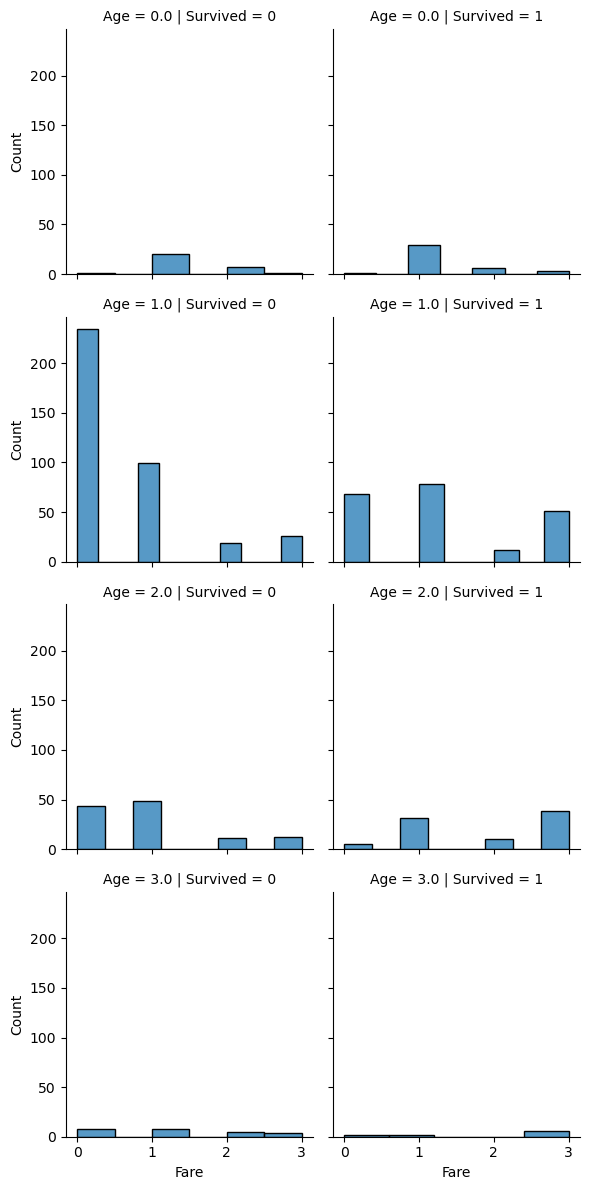

In [19]:
fare_age_grid = sns.FacetGrid(df, row='Age', col='Survived')
fare_age_grid.map(sns.histplot, 'Fare')

In [20]:
df[['Embarked', 'Fare']].groupby(['Embarked']).mean().sort_values(by='Fare')

,Fare
Embarked,
Q,0.350649
S,0.907121
C,1.583333


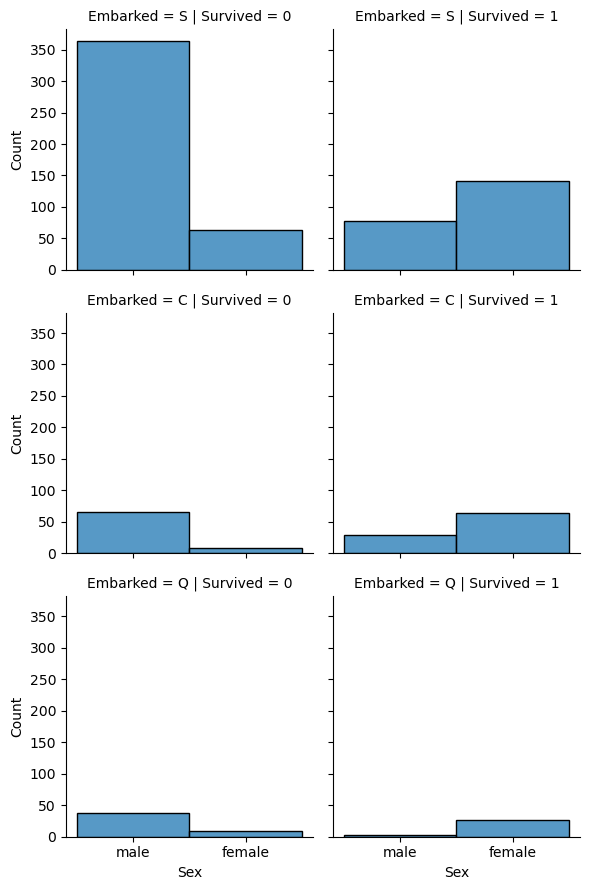

In [21]:
embarked_grid = sns.FacetGrid(df, row='Embarked', col='Survived')
embarked_grid.map(sns.histplot, 'Sex')

In [22]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,1.0,1,0,0.0,S
1,2,1,1,female,2.0,1,0,3.0,C
2,3,1,3,female,1.0,0,0,0.0,S
3,4,1,1,female,2.0,1,0,2.0,S
4,5,0,3,male,2.0,0,0,0.0,S


([<matplotlib.axis.XTick at 0x21641a3cfd0>,
 [Text(1.4, 0, '1'), Text(2.2, 0, '2'), Text(3.0, 0, '3')])

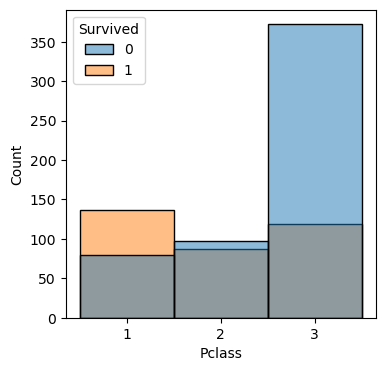

In [23]:
fig_class = plt.figure(figsize=(4,4))
sns.histplot(df, x='Pclass', hue='Survived', binwidth=0.8)
plt.xticks(labels=['1', '2' , '3'], ticks=[1.4, 2.2, 3])

Text(0.5, 0.98, 'People with family stats')

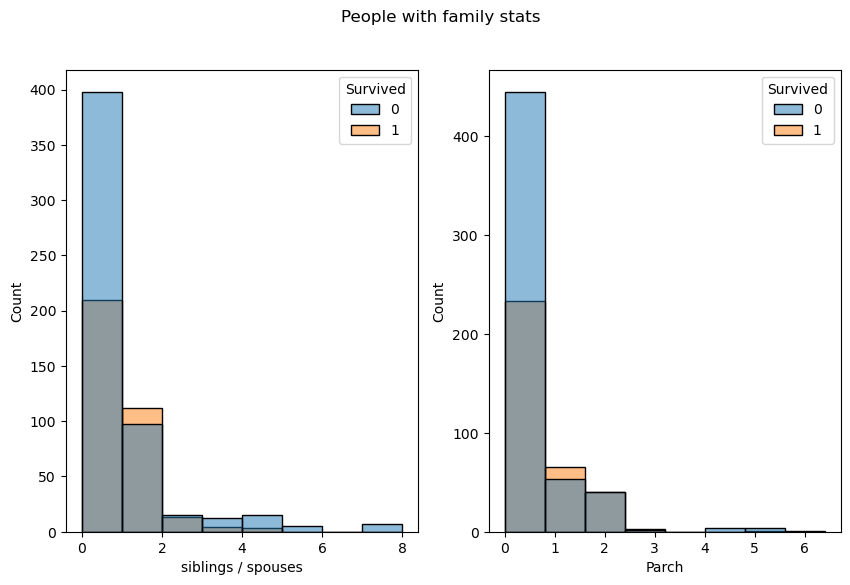

In [24]:
surv_rate_fam, axes = plt.subplots(1,2, figsize=(10, 6))
sns.histplot(data=df, x='SibSp', hue='Survived', ax=axes[0], binwidth=1)
sns.histplot(data=df, x='Parch', hue='Survived', ax=axes[1], binwidth=0.8)
axes[0].set_xlabel('siblings / spouses')
surv_rate_fam.suptitle('People with family stats')

<AxesSubplot:xlabel='Family_size', ylabel='Count'>

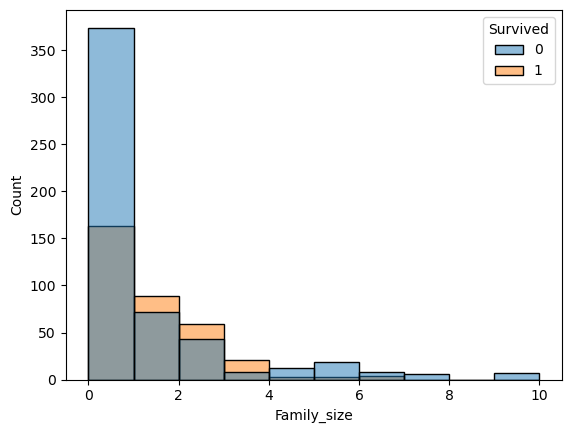

In [25]:
#combining both SibSp and Parch in one column
for dataset in datasets:
    dataset['Family_size'] = dataset['SibSp'] + dataset['Parch']
    dataset['No_family'] = ~dataset.index.isin(dataset[dataset['Family_size']>0].index)
    dataset.drop(['SibSp', 'Parch'], axis=1, inplace=True)
sns.histplot(data=df, x='Family_size', hue='Survived', binwidth=1)

In [26]:
#encoding categorical features
for dataset in datasets:
    dataset.No_family.replace([False, True], [0, 1], inplace=True)
    dataset.replace(['male', 'female'], [0, 1], inplace=True)
    dataset.replace(['C', 'S', 'Q'], [1, 2, 3], inplace=True)

In [27]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Family_size,No_family
0,1,0,3,0,1.0,0.0,2,1,0
1,2,1,1,1,2.0,3.0,1,1,0
2,3,1,3,1,1.0,0.0,2,0,1
3,4,1,1,1,2.0,2.0,2,1,0
4,5,0,3,0,2.0,0.0,2,0,1


(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5]),
 [Text(0, 0.5, 'PassengerId'),
  Text(0, 1.5, 'Survived'),
  Text(0, 2.5, 'Pclass'),
  Text(0, 3.5, 'Sex'),
  Text(0, 4.5, 'Age'),
  Text(0, 5.5, 'Fare'),
  Text(0, 6.5, 'Embarked'),
  Text(0, 7.5, 'Family_size'),
  Text(0, 8.5, 'No_family')])

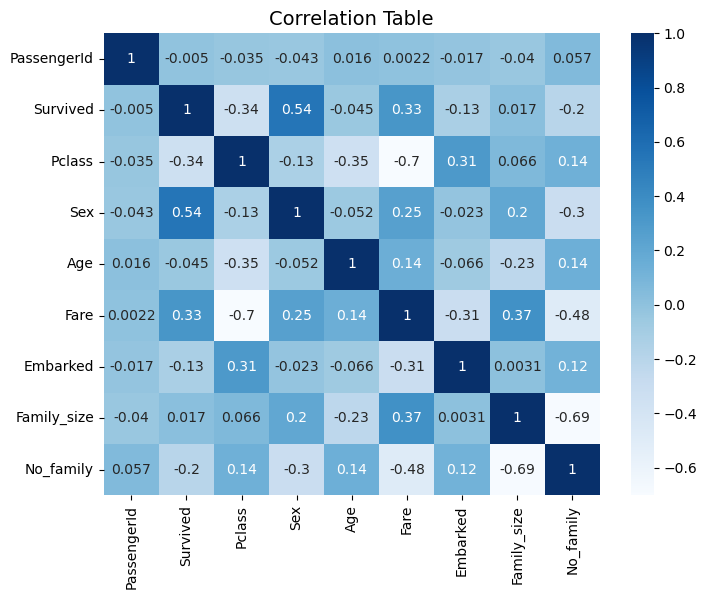

In [28]:
hm_fig = plt.figure(figsize=(8,6))
corr = df.corr()
sns.heatmap(corr, cmap="Blues", annot=True,
            xticklabels=corr.columns,
            yticklabels=corr.columns)
plt.title('Correlation Table', fontdict={'fontsize': 14})
plt.yticks(rotation=0)

In [29]:
X = df.drop(['Survived', 'PassengerId', 'Embarked'], axis=1)
y = df.Survived

In [30]:
X.head()

,Pclass,Sex,Age,Fare,Family_size,No_family
0,3,0,1.0,0.0,1,0
1,1,1,2.0,3.0,1,0
2,3,1,1.0,0.0,0,1
3,1,1,2.0,2.0,1,0
4,3,0,2.0,0.0,0,1


In [31]:
X.shape #if shape 891 => all fine: we haven't lost any data

(891, 6)

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [33]:
rf = RandomForestClassifier(criterion='gini',random_state=123)
params = {'n_estimators': range(1, 35, 2), 'max_depth': range(2, 10),
          'min_samples_leaf': range(1, 10), 'min_samples_split': range(2, 10)}
grid_rf = GridSearchCV(rf, params, scoring='accuracy', cv=3, n_jobs=-1)

In [34]:
grid_rf.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=123),
             n_jobs=-1,
             param_grid={'max_depth': range(2, 10),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10),
                         'n_estimators': range(1, 35, 2)},
             scoring='accuracy')

In [35]:
best_rf = grid_rf.best_estimator_
best_rf.get_params

<bound method BaseEstimator.get_params of RandomForestClassifier(max_depth=4, min_samples_split=7, n_estimators=23,
                       random_state=123)>

Text(0, 0.5, 'feature')

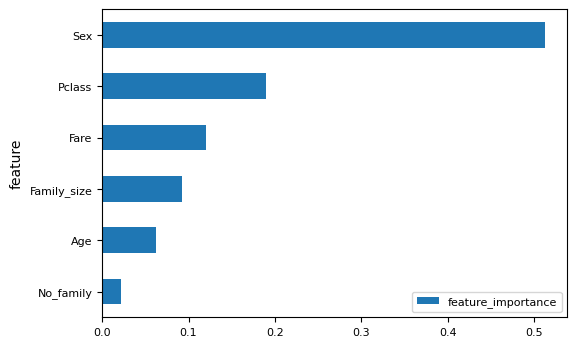

In [36]:
features_scores = best_rf.feature_importances_
feat = pd.DataFrame({'feature': list(X), 'feature_importance': features_scores})
feat['feature_importance'] = feat['feature_importance'].round(4)
matplotlib.rcParams.update({'font.size': 8})
feat.sort_values(by='feature_importance', ascending=True)\
    .plot(y='feature_importance', x='feature', kind='barh', figsize=(6,4))
plt.ylabel('feature', fontdict={'fontsize': 10})

In [37]:
predictions = best_rf.predict(X_test)
accuracy = accuracy_score(y_test, predictions) #estimate our model with accuracy,
accuracy                                       #as it's said in task description

0.8491620111731844

In [38]:
X_test = test_df.drop(['Embarked', 'PassengerId'], axis=1)

In [39]:
X_test.head()

,Pclass,Sex,Age,Fare,Family_size,No_family
0,3,0,1.0,0.0,0,1
1,3,1,2.0,0.0,1,0
2,2,0,3.0,0.0,0,1
3,3,0,1.0,0.0,0,1
4,3,1,1.0,1.0,2,0


In [40]:
df = pd.DataFrame(best_rf.predict(X_test), index=test_df.PassengerId, columns=['Survived'])
df.head()

,Survived
PassengerId,
892,0
893,0
894,0
895,0
896,1


In [41]:
df.to_csv('titanic_competition.csv')